<center><span style="font-family:Comic Sans MS; color:navy "><h1>Traffic Predictions(Feature Engineering,Decision Tree🎄,100% Accuracy)</h1></span></center>

# <b>a <span style='color:#94D4F6'>|</span> Table of Conents</b>
<a id="toc"></a>
- [1. Import Libraries](#1)
- [2. Read Dataset](#2)
- [3. Preprocessing](#3)
- [4. Visualization](#4)
- [5. Feature Engineering](#5)
- [6. Split Dataset](#6)
- [7. Modeling](#7)
- [8. Predict test data](#8)
- [9. Evaluation](#9) 

# <b>b <span style='color:#94D4F6'>|</span> About DataSet</b>

<div class="alert alert-block alert-info" style="font-size:17px; background-color: #EEEFFF; font-family:Comic Sans MS; color: #00011A; border: 1px #00011A">
Who knows the dataset better than the person who created it?!<br>
That person is me, but here I will not add more details. You can just click the below icon and go to the dataset page to read the details.
                       <!DOCTYPE html>
<html>
<body>
    <button style="background-color: #d4d6cb; color: white; padding: 10px 20px; font-size: 15px; border: none; cursor: pointer;">
        <a href="https://www.kaggle.com/datasets/hasibullahaman/traffic-prediction-dataset">More</a></button>
</body>
</html><br><br>
In fact, this dataset is the product of a system that is embedded in a route and calculates the number of cars and saves it in a file that can be used to predict traffic on that route.<br>
As part of our system, our task in this notebook is to predict the traffic situation using the data we have in hand.<br>
    
Just as Dataset receives its new record every 15 minutes, we will predict the traffic density for the next 15 minutes using past data.<br>
As a motivational part, I must say that this notebook is part of a system for traffic management, and I will soon publish my article about that system.

Thanks

<a id="1"></a>
# <b>1 <span style='color:#94D4F6'>|</span> Import Libraries</b>


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import (
    OneHotEncoder,
    MinMaxScaler,
    LabelEncoder, 
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import( accuracy_score,
                            precision_score,
                            recall_score,
                            f1_score,
                            confusion_matrix,
                            roc_curve,
                            roc_auc_score,
                            )

# Modeling
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso
)
from sklearn.model_selection import(
    train_test_split,# used to split the data into training and testing
    RandomizedSearchCV,# used for tuning the models parameters
    cross_val_score,
)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")



<a id="2"></a>
# <b>2 <span style='color:#94D4F6'>|</span> Read Dataset</b>

In [2]:
traffic_df = pd.read_csv('/kaggle/input/traffic-prediction-dataset/Traffic.csv')
traffic_df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


<a id="3"></a>
# <b>3 <span style='color:#94D4F6'>|</span> Preprocessing </b>

### Describe the dataset

In [3]:
traffic_df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


<div style="font-size:15px; font-family:verdana; color: #00011A; border: 1px #00011A">
    I will visualize the information, but here we can capture useful statistical information like the mean, max, min, standard deviation (std), and so on.

### Names of columns

In [4]:
traffic_df.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

<div style="font-size:15px; font-family:verdana; color: #00011A; border: 1px #00011A">
    Our target variable is 'Traffic Situation,' and the other columns are our features that we want to use in order to create our model.

### Types of columns

In [5]:
traffic_df.dtypes

Time                 object
Date                  int64
Day of the week      object
CarCount              int64
BikeCount             int64
BusCount              int64
TruckCount            int64
Total                 int64
Traffic Situation    object
dtype: object

<div style="font-size:15px; font-family:verdana; color: #00011A; border: 1px #00011A">
    We will interact with this column later!

### Create an empty 'midday' column

In [6]:
df_complete = traffic_df.copy()
df_1d = traffic_df.head(96) # it need in EDA latter!
df_1d

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
...,...,...,...,...,...,...,...,...,...
91,10:45:00 PM,10,Tuesday,11,1,0,29,41,normal
92,11:00:00 PM,10,Tuesday,18,2,1,13,34,normal
93,11:15:00 PM,10,Tuesday,15,0,1,11,27,low
94,11:30:00 PM,10,Tuesday,14,1,0,33,48,normal


In [7]:

traffic_df['midday'] = ''  

for i in range(len(traffic_df['Time'])):
    
    if traffic_df['Time'][i][-2:] == 'AM':
        traffic_df.loc[i, 'midday'] = 'AM'
        
    elif traffic_df['Time'][i][-2:] == 'PM':
        traffic_df.loc[i, 'midday'] = 'PM'
        
# removing 'AM' or 'PM' form Time column        
traffic_df['Time'] = traffic_df['Time'].str[:-2]

<div style="font-size:15px; font-family:verdana; color: #00011A; border: 1px #00011A">
Adding the values of 'AM' & 'PM' to midday column

In [8]:
traffic_df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,midday
0,12:00:00,10,Tuesday,31,0,4,4,39,low,AM
1,12:15:00,10,Tuesday,49,0,3,3,55,low,AM
2,12:30:00,10,Tuesday,46,0,3,6,55,low,AM
3,12:45:00,10,Tuesday,51,0,2,5,58,low,AM
4,1:00:00,10,Tuesday,57,6,15,16,94,normal,AM
...,...,...,...,...,...,...,...,...,...,...
2971,10:45:00,9,Thursday,16,3,1,36,56,normal,PM
2972,11:00:00,9,Thursday,11,0,1,30,42,normal,PM
2973,11:15:00,9,Thursday,15,4,1,25,45,normal,PM
2974,11:30:00,9,Thursday,16,5,0,27,48,normal,PM


<div style="font-size:15px; font-family:verdana; color: #00011A; border: 1px #00011A">
As you can see, we have added a new column named 'midday' that splits the 'Time' column into two columns. One of these columns is our 'midday' column, which we can use later in encoding and convert it into binary.

<a id="4"></a>
# <b>3 <span style='color:#94D4F6'>|</span> Exploratory Data Analysis --> EDA </b>

#### At first, I made some changes to the default settings for EDA.

In [9]:
# The theme and size and resolution of the plots
# figure size
plt.figure(figsize=(6,3))  
# background, color type
sns.set_theme(style="whitegrid", palette="muted")
sns.set_context('notebook', font_scale = 1.0, rc={"lines.linewidth": 1.5})
# font properties
plt.rcParams['font.family']='cursive'
plt.rcParams['font.stretch']='condensed'
plt.rcParams['font.style']='italic'
plt.rcParams['font.weight']='heavy'
plt.rcParams['font.size']=15
# resolution
plt.rcParams['figure.dpi'] = 120  # resolution

<Figure size 600x300 with 0 Axes>

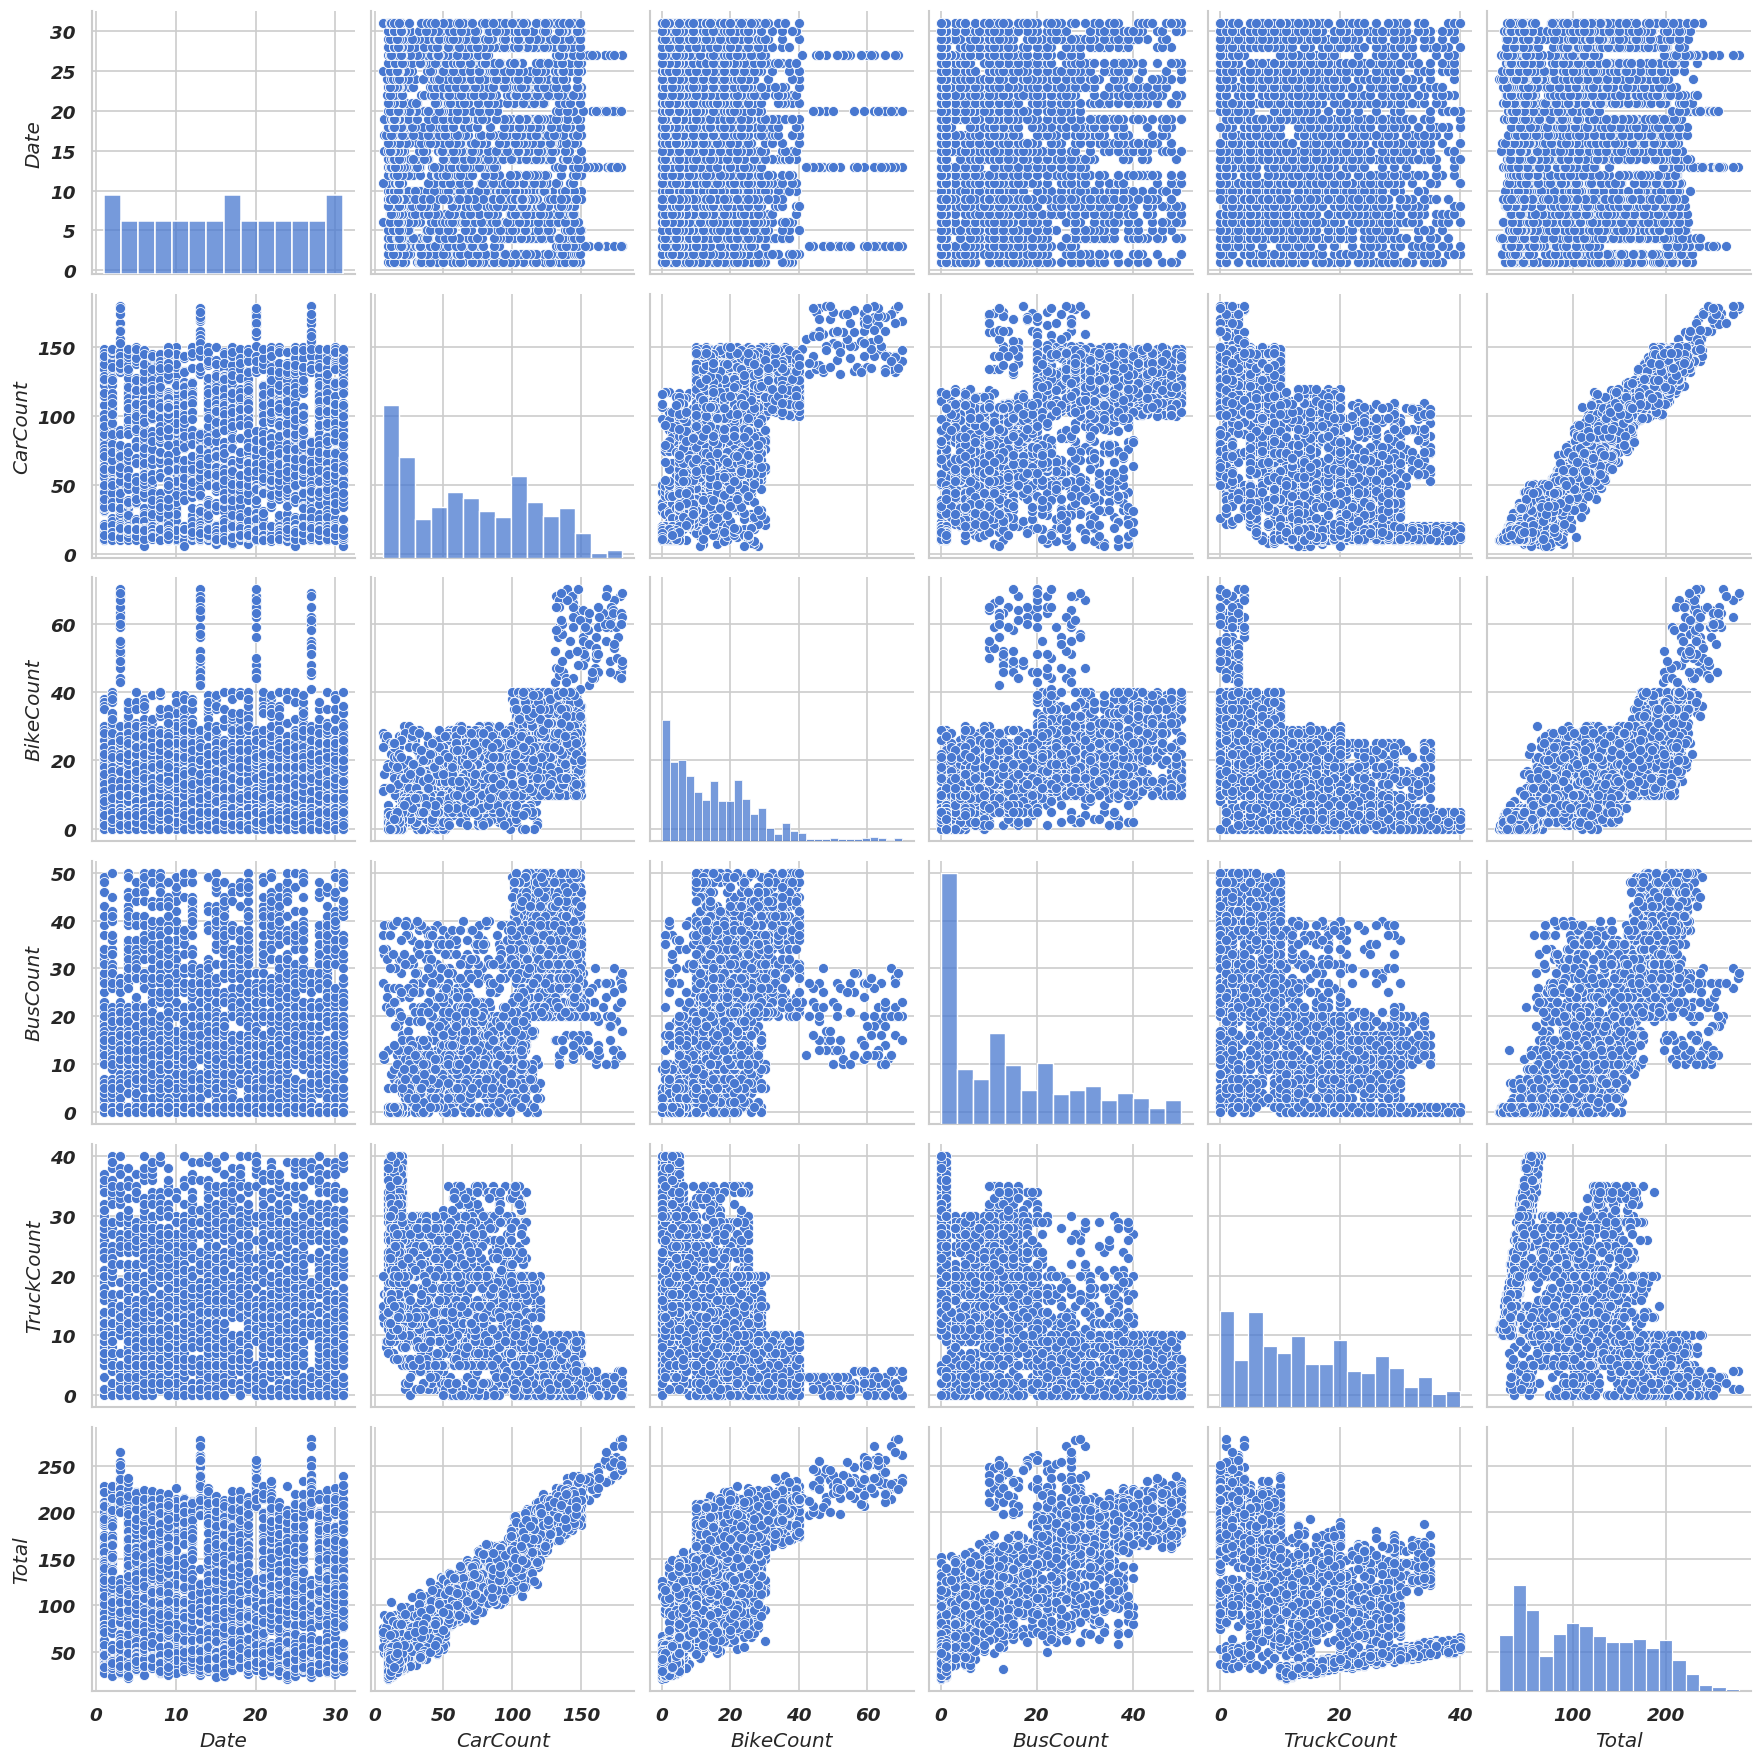

In [10]:
# Plot the numeric features
numeric_columns = ['Time', 'Date', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']
sns.pairplot(traffic_df[numeric_columns])
plt.show()

<div style="font-size:15px; font-family:verdana; color: #00011A; border: 1px #00011A">
As an idea, from this plot, we can gather much more information and observe relationships. For example, we can easily see the frequency of car counts on different dates and generate various insights. I will visualize some of these ideas.

#### First, let's examine how the count of different types of vehicles affects the Traffic Situation! 

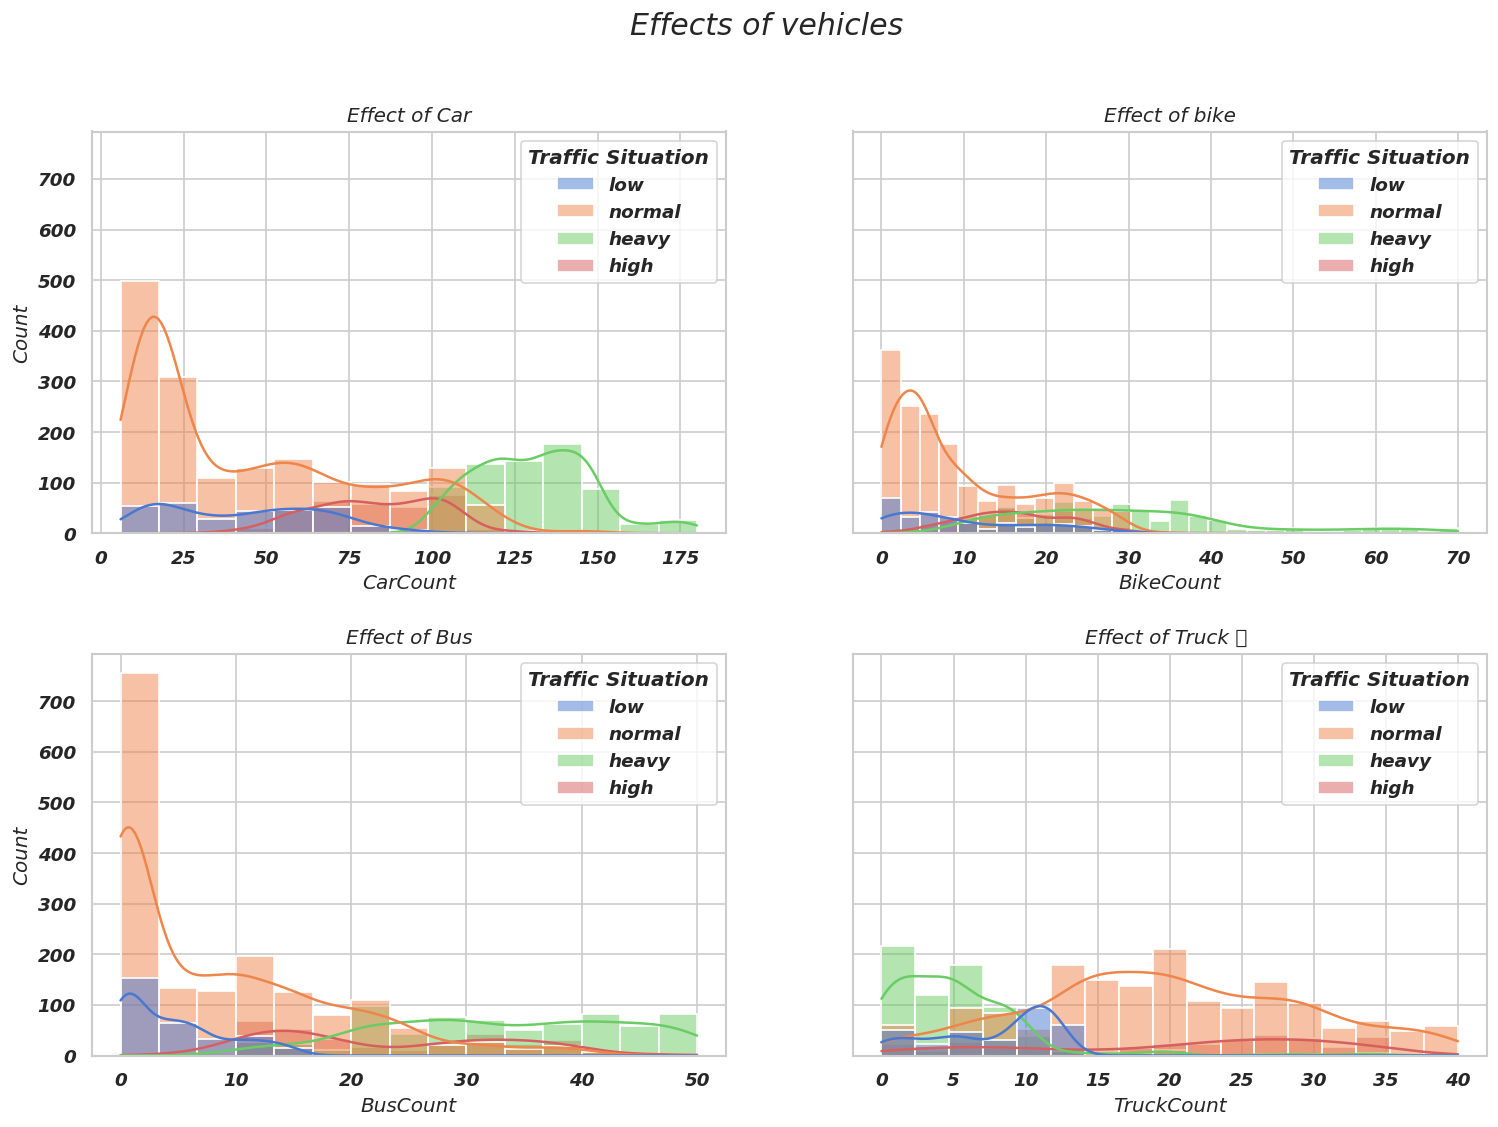

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
fig.suptitle('Effects of vehicles')
# ------------- First-plot(1,1)
sns.histplot(traffic_df,x='CarCount',hue='Traffic Situation',kde=True,ax=axes[0,0])
axes[0,0].set_title('Effect of Car')
# ------------- Second-plot(1,2)
sns.histplot(traffic_df,x='BikeCount',hue='Traffic Situation',kde=True,ax=axes[0,1])
axes[0,1].set_title('Effect of bike')
# ------------- Third-plot(2,1)
sns.histplot(traffic_df,x='BusCount',hue='Traffic Situation',kde=True,ax=axes[1,0])
axes[1,0].set_title('Effect of Bus')
# ------------ Forth-plot(2,2)
sns.histplot(traffic_df,x='TruckCount',hue='Traffic Situation',kde=True,ax=axes[1,1])
axes[1,1].set_title('Effect of Truck 🚚 ')
plt.subplots_adjust(hspace=0.3)
plt.show()

In this analysis, we can easily observe the effects of different vehicles on the traffic situation:
  - Cars contribute to heavy traffic when the number of cars exceeds 100 within a 15-minute interval. This observation also holds true for buses when the count reaches 25 or more.
  - Additionally, we can observe that the impact of bikes on traffic is relatively low.
  - However, there is an anomaly regarding trucks. In this particular road, there are restrictions on trucks during the day. Although there are exceptions, trucks tend to travel more during the night than during the day. Only a few trucks contribute to traffic due to their slower speed, similar to buses.

#### Let's talk about When!
<div style="font-size:15px; font-family:verdana; color: #00011A; border: 1px #00011A">

Someone might ask questions like:
  - What is the traffic situation during heavy traffic?
  - How will the traffic be tomorrow at 10 am?
  - On which day of the week is this route more congested?

Let's visualize these scenarios!

In [12]:
hours = ['12:00','','','','1:00','','','','2:00','','','','3:00','','','','4:00','','','','5:00','','','','6:00','','','','7:00','','','','8:00','','','','9:00','','','','10:00','','','','11:00']

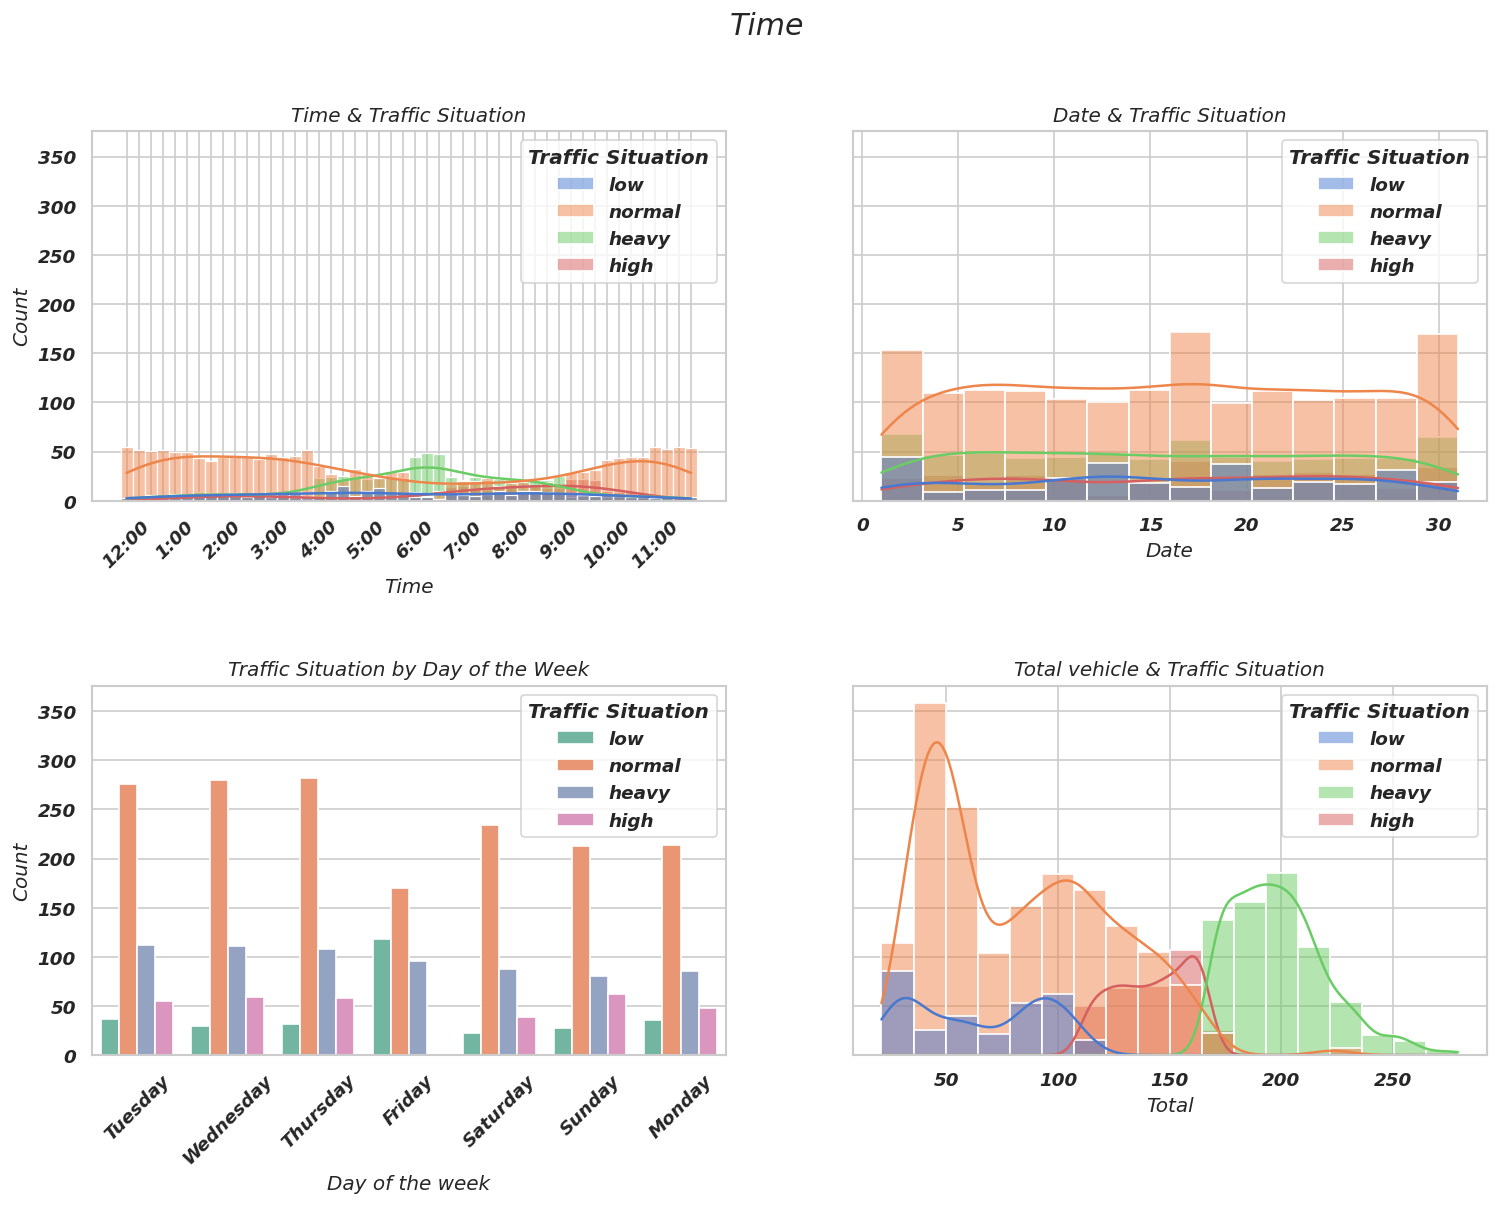

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
fig.suptitle('Time')

sns.histplot(traffic_df, x='Time', hue='Traffic Situation', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Time & Traffic Situation')
axes[0, 0].set_xticklabels(hours, rotation=45)

sns.histplot(traffic_df, x='Date', hue='Traffic Situation', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Date & Traffic Situation')

sns.countplot(data=traffic_df, x="Day of the week", hue="Traffic Situation", palette="Set2", ax=axes[1, 0])
axes[1, 0].set_xlabel("Day of the week")
axes[1, 0].set_ylabel("Count")
axes[1, 0].set_title("Traffic Situation by Day of the Week")
# Set the tick positions and labels
tick_positions = range(len(traffic_df['Day of the week'].unique()))
tick_labels = traffic_df['Day of the week'].unique()

# Set the tick positions and labels on the x-axis
axes[1, 0].set_xticks(tick_positions)
axes[1, 0].set_xticklabels(tick_labels, rotation=45)
# axes[1, 0].set_xticklabels(traffic_df['Day of the week'], rotation=45)

sns.histplot(traffic_df, x='Total', hue='Traffic Situation', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Total vehicle & Traffic Situation')

plt.subplots_adjust(hspace=0.5)
plt.show()

In the above visualization, we can gather various information such as the relationship between the hour of the day and traffic, as well as the correlation between the day of the week and traffic. These insights provide valuable information about traffic patterns and trends

#### How many cars per hour?
<div style="font-size:15px; font-family:verdana; color: #00011A; border: 1px #00011A">
    
In this discussion, we will cover the following points:
  - How many cars pass through the road?
  - How many bikes, trucks, or buses?
  - What is the impact of these vehicles on the traffic situation?

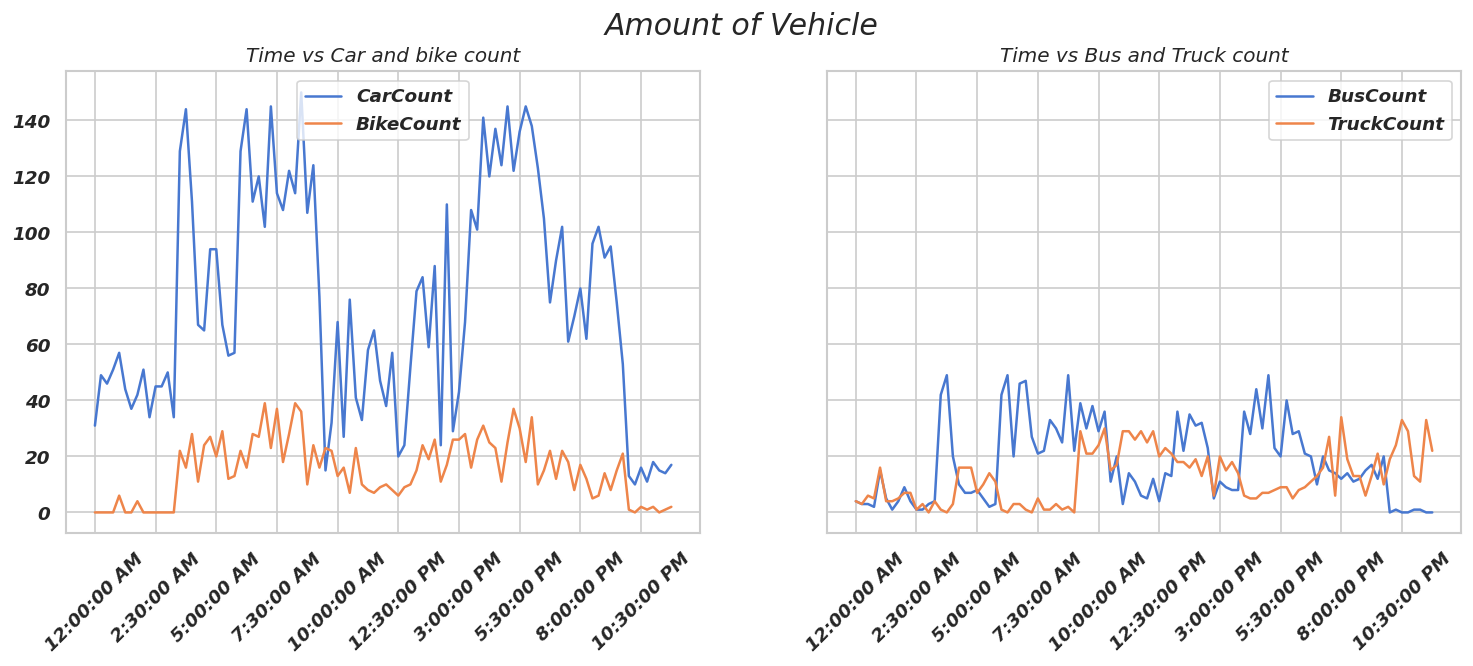

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Amount of Vehicle')
# -------------- First Plot (1,1)
axes[0].plot(df_1d['Time'], df_1d['CarCount'])
axes[0].plot(df_1d['Time'], df_1d['BikeCount'])
axes[0].legend(df_complete.columns[3:5])
axes[0].set_title('Time vs Car and bike count')
axes[0].set_xticks(df_1d['Time'][::10])  # Display every 10th label
axes[0].set_xticklabels(df_1d['Time'][::10], rotation=45)

# ------------- Second Plot (1,2)
axes[1].plot(df_1d['Time'], df_1d['BusCount'])
axes[1].plot(df_1d['Time'], df_1d['TruckCount'])
axes[1].set_title('Time vs Bus and Truck count')
axes[1].legend(df_complete.columns[5:7])
axes[1].set_xticks(df_1d['Time'][::10])  # Display every 10th label
axes[1].set_xticklabels(df_1d['Time'][::10], rotation=45)

plt.show()

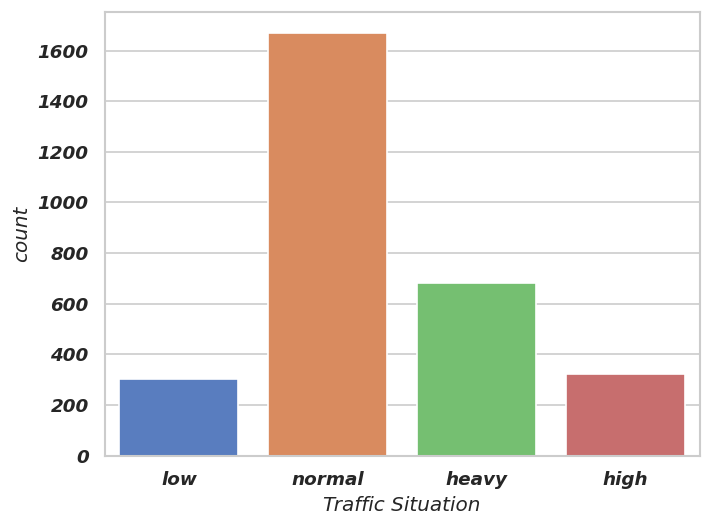

In [15]:
# Plot the target variable 'Traffic Situation'
sns.countplot(x='Traffic Situation', data=traffic_df)
plt.show()

<a id="5"></a>
# <b>4 <span style='color:#94D4F6'>|</span> Feature Engineering</b>

### Changing the Time Column from (Hour:Min:Sec) format to Second

In [16]:
# Assuming 'Time' is the name of the column in your DataFrame
traffic_df['Time'] = pd.to_datetime(traffic_df['Time']).dt.hour * 3600 + \
                     pd.to_datetime(traffic_df['Time']).dt.minute * 60 + \
                     pd.to_datetime(traffic_df['Time']).dt.second
traffic_df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,midday
0,43200,10,Tuesday,31,0,4,4,39,low,AM
1,44100,10,Tuesday,49,0,3,3,55,low,AM
2,45000,10,Tuesday,46,0,3,6,55,low,AM
3,45900,10,Tuesday,51,0,2,5,58,low,AM
4,3600,10,Tuesday,57,6,15,16,94,normal,AM


The time ⌚ was in a format that we couldn't process. We simply changed it to seconds, and it will be processed with the help of the "midday" column.

In [17]:
traffic_df['Traffic Situation'].value_counts()

Traffic Situation
normal    1669
heavy      682
high       321
low        304
Name: count, dtype: int64

### Normalize and Encode the columns

Time, Date, Day of the week, CarCount, BikeCount, BusCount, TruckCount, Total columns are numeric columns and midday, 

In [18]:
# Separate the features and target variable
features = traffic_df.drop(['Traffic Situation'], axis=1)
target = traffic_df['Traffic Situation']

We need to separate our features and target variable. 

In [19]:
# Normalize the numeric features using MinMaxScaler
numeric_columns = ['Time', 'Date', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']
scaler = MinMaxScaler()
features[numeric_columns] = scaler.fit_transform(features[numeric_columns])

We use the MinMaxScaler to normalize the features for easy computations. 

In [20]:
# Encode the categorical feature 'midday' using LabelEncoder
le = LabelEncoder()
features['midday'] = le.fit_transform(features['midday'])
features['Day of the week'] = le.fit_transform(features['Day of the week'])

# Encode the target variable 'Traffic Situation' using LabelEncoder
le_target = LabelEncoder()
target = le_target.fit_transform(target)

We can't work with categorical features, so we use the Label Encoder to convert them to numerical.

In [21]:
# Concatenate the features and target variable
normalized_encoded_data = pd.concat([features, pd.Series(target, name='Traffic Situation')], axis=1)

We have our data stored as a dataset!

In [22]:
traffic_df = normalized_encoded_data
traffic_df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,midday,Traffic Situation
0,0.936170,0.300000,5,0.143678,0.000000,0.08,0.100,0.069767,0,2
1,0.957447,0.300000,5,0.247126,0.000000,0.06,0.075,0.131783,0,2
2,0.978723,0.300000,5,0.229885,0.000000,0.06,0.150,0.131783,0,2
3,1.000000,0.300000,5,0.258621,0.000000,0.04,0.125,0.143411,0,2
4,0.000000,0.300000,5,0.293103,0.085714,0.30,0.400,0.282946,0,3
...,...,...,...,...,...,...,...,...,...,...
2971,0.829787,0.266667,4,0.057471,0.042857,0.02,0.900,0.135659,1,3
2972,0.851064,0.266667,4,0.028736,0.000000,0.02,0.750,0.081395,1,3
2973,0.872340,0.266667,4,0.051724,0.057143,0.02,0.625,0.093023,1,3
2974,0.893617,0.266667,4,0.057471,0.071429,0.00,0.675,0.104651,1,3


<a id="6"></a>
## Spliting The Dataset to Train and Test

In [23]:

X = traffic_df.drop('Traffic Situation', axis=1)
y = traffic_df['Traffic Situation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2678, 9), (298, 9), (2678,), (298,))

At this part, I separate my dataset into two parts: test and train.

In [24]:
X_train

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,midday
2620,0.510638,0.166667,1,0.816092,0.142857,0.56,0.050,0.647287,0
2353,0.957447,0.066667,0,0.735632,0.671429,0.44,0.075,0.717054,1
1309,0.191489,0.733333,1,0.126437,0.214286,0.54,0.300,0.236434,1
1190,0.723404,0.700000,2,0.160920,0.071429,0.54,0.550,0.259690,0
2167,0.063830,0.000000,6,0.586207,0.242857,0.66,0.175,0.558140,1
...,...,...,...,...,...,...,...,...,...
1638,0.042553,0.866667,0,0.080460,0.028571,0.00,0.425,0.069767,0
1095,0.744681,0.666667,3,0.528736,0.300000,0.20,0.125,0.437984,0
1130,0.468085,0.666667,3,0.632184,0.314286,0.46,0.175,0.569767,1
1294,0.893617,0.733333,1,0.195402,0.128571,0.30,0.700,0.275194,0


In [25]:
y_train

2620    0
2353    0
1309    3
1190    3
2167    1
       ..
1638    3
1095    3
1130    0
1294    3
860     3
Name: Traffic Situation, Length: 2678, dtype: int64

<a id="7"></a>
# <b>5 <span style='color:#94D4F6'>|</span> Modeling</b>

<div style="color:white;display:fill;border-radius:8px;background-color:#03112A;font-size:150%;letter-spacing:1.0px"><p style="padding: 10px;color:white;"><b><b><span style='color:#94D4F6'>5.1 |</span></b> Initial models test </b></p></div>

In [26]:
init_models = {
    'support vector linear' : SVR(kernel='linear'),
    'support vector kernel' : SVR(kernel= 'rbf'),
    'XGBOOST':XGBRegressor(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'LGBM' : LGBMRegressor()
}

In [27]:
R2 = []
models_names = []
for i,(key,model) in enumerate(init_models.items()):
    model.fit(X_train,y_train)
    models_names.append(key)
    R2.append(np.mean(cross_val_score(model,X_train,y_train,cv=5)))
models_scores = pd.DataFrame({'model name':models_names,'R2 score':R2})
models_scores.head(7)

,model name,R2 score
0,support vector linear,0.594565
1,support vector kernel,0.679043
2,XGBOOST,0.999957
3,Decision Tree,1.000000
4,Random Forest,0.997001
5,LGBM,0.995323


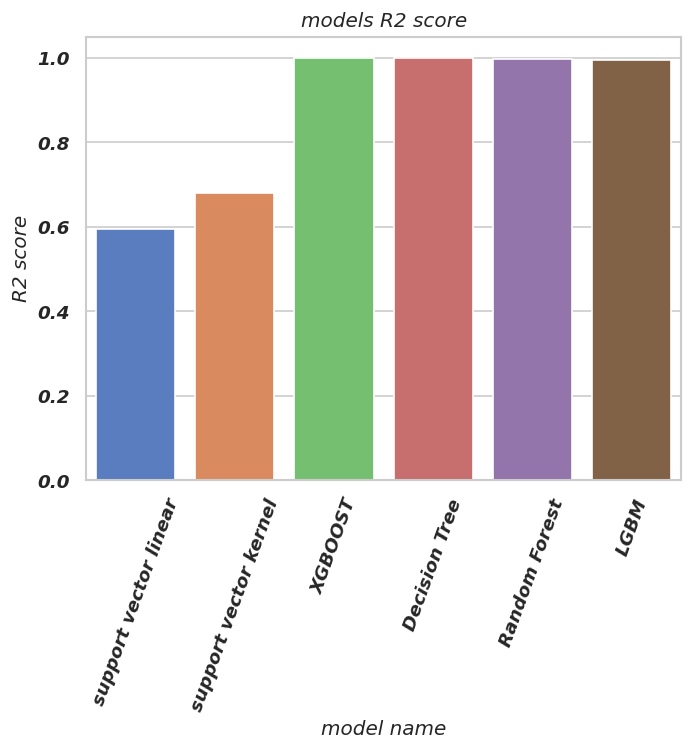

In [28]:
fig, ax = plt.subplots()
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
ax.set_title("models R2 score")
sns.barplot(data=models_scores, x='model name', y="R2 score")
plt.show()

As you can see, the Decision Tree model is the best, and we will use it for our final prediction. Additionally, since the accepted score is satisfactory, we don't need to tune the model.

In [29]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

<a id="8"></a>
# <b>6 <span style='color:#94D4F6'>|</span> Prediction</b>

In [30]:
y_pred = model.predict(X_test)

<a id="9"></a>
# <b>6 <span style='color:#94D4F6'>|</span> Evaluation</b>

In [31]:
y_test, y_pred

(2404    2
 2866    1
 2775    3
 507     1
 1825    3
        ..
 1600    0
 239     3
 532     3
 700     1
 1068    3
 Name: Traffic Situation, Length: 298, dtype: int64,
 array([2., 1., 3., 1., 3., 2., 3., 3., 3., 3., 0., 3., 2., 3., 2., 1., 1.,
        3., 3., 3., 3., 3., 0., 3., 0., 3., 0., 3., 0., 1., 3., 3., 3., 2.,
        3., 0., 1., 2., 3., 0., 3., 3., 3., 3., 0., 3., 3., 3., 2., 2., 3.,
        0., 3., 3., 2., 3., 3., 3., 3., 3., 3., 0., 3., 3., 2., 3., 3., 3.,
        1., 3., 2., 3., 2., 3., 3., 2., 3., 1., 1., 3., 3., 3., 0., 3., 0.,
        3., 3., 0., 0., 0., 3., 3., 1., 3., 0., 0., 0., 3., 3., 3., 3., 3.,
        0., 3., 3., 2., 0., 3., 3., 3., 0., 3., 1., 3., 0., 0., 3., 0., 2.,
        2., 1., 2., 0., 2., 3., 3., 2., 3., 0., 2., 1., 1., 3., 0., 0., 3.,
        3., 3., 3., 0., 3., 1., 0., 1., 0., 1., 0., 0., 2., 0., 3., 0., 3.,
        2., 2., 1., 3., 3., 3., 1., 0., 3., 2., 1., 0., 0., 0., 3., 3., 3.,
        3., 3., 3., 3., 3., 1., 0., 3., 3., 3., 1., 2., 3., 3., 3.

In [32]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision with 'weighted' average setting
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate recall with 'weighted' average setting
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1 score with 'weighted' average setting
f1 = f1_score(y_test, y_pred, average='weighted')


In [33]:
print(f'Accuracy: {accuracy}')
print(f'precision: {precision}') 
print(f'recall: {recall}') 
print(f'f1_score: {f1}') 

Accuracy: 1.0
precision: 1.0
recall: 1.0
f1_score: 1.0


### Ploting Confusion Matrix

In [34]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 72,   0,   0,   0],
       [  0,  33,   0,   0],
       [  0,   0,  34,   0],
       [  0,   0,   0, 159]])

In [35]:
def plot_confusion_matrix(confusion_matrix, classes):

    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = confusion_matrix.max() / 2.
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            plt.text(j, i, format(confusion_matrix[i, j], fmt),
                     ha="center", va="center",
                     color="white" if confusion_matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    # Show the plot
    plt.show()

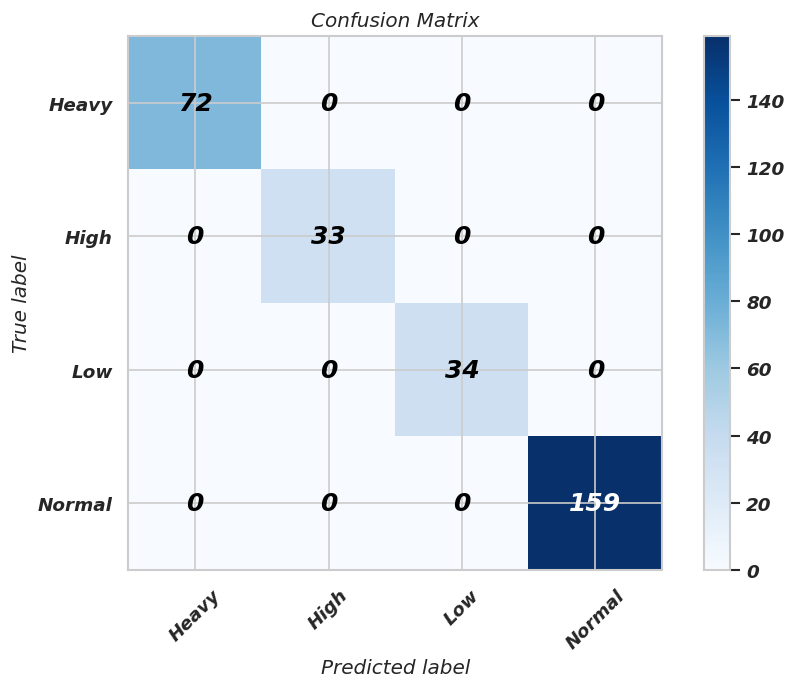

In [36]:

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=['Heavy', 'High', 'Low', 'Normal'])
plt.show()

<center>
<span style="font-family:Comic Sans MS; color:red"><h2>Thank You😊</h2></span>
</center>